# 0.5 Data preprocessing

## Imports

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from pyprojroot import here

In [2]:
setup_file = here("notebooks").joinpath("0.3-jvs-setup.ipynb")
%run $setup_file

## Load data

In [3]:
data_dir = datadir("external")

### Mexican government

In [4]:
mexican_government_data_dir = data_dir.joinpath("mexican_government")

#### Cases

In [5]:
cases_dir = mexican_government_data_dir.joinpath("cases")
last_cases_update_file = !ls -1 -t $cases_dir
cases_file = cases_dir.joinpath(last_cases_update_file[0])
#cases_file = cases_dir.joinpath("200810COVID19MEXICO.csv")
cases_file.exists()

True

In [6]:
date_columns = ["FECHA_{}".format(name) for name in ["ACTUALIZACION", "INGRESO", "SINTOMAS", "DEF"]]
cases_df = pd.read_csv(filepath_or_buffer=cases_file, engine="python", parse_dates=date_columns, date_parser=lambda x: pd.to_datetime(x, errors="coerce"))

In [7]:
print(cases_df.shape)
print(cases_df.columns)
cases_df.head()

(1112114, 35)
Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-08-11,1a62a3,2,3,15,1,15,15,2,1,...,2,2,2,2,1,1,99,México,99,97
1,2020-08-11,1491cc,2,3,27,1,27,27,4,1,...,2,2,2,2,1,1,99,México,99,97
2,2020-08-11,12bed1,2,3,15,1,15,15,106,1,...,2,2,2,2,99,1,99,México,99,97
3,2020-08-11,117245,2,3,25,2,26,25,6,1,...,2,2,2,2,99,1,99,México,99,97
4,2020-08-11,117cf6,2,3,27,1,27,27,13,2,...,2,2,2,2,2,1,99,México,99,2


#### Data dictionary

In [8]:
catalogs_file = mexican_government_data_dir.joinpath("data_dictionary", "diccionario_datos_covid19/Catalogos_0412.xlsx")
catalogs_file.exists()

True

In [9]:
catalogs_dfs = pd.read_excel(io=catalogs_file, sheet_name=None)
print(catalogs_dfs.keys())
catalogs_dfs["Catálogo SECTOR"].head()

dict_keys(['Catálogo ORIGEN', 'Catálogo SECTOR', 'Catálogo SEXO', 'Catálogo TIPO_PACIENTE', 'Catálogo SI_NO', 'Catálogo NACIONALIDAD', 'Catálogo RESULTADO', 'Catálogo de ENTIDADES', 'Catálogo MUNICIPIOS'])


,CLAVE,DESCRIPCIÓN
0,1,CRUZ ROJA
1,2,DIF
2,3,ESTATAL
3,4,IMSS
4,5,IMSS-BIENESTAR


### Geospatial

In [10]:
geospatial_dir = datadir("external", "geospatial")
geospatial_dir.exists()

True

#### Geometries

In [11]:
geometries_dir = geospatial_dir.joinpath("mg_sep2019_integrado", "conjunto_de_datos")

##### States

In [12]:
ent_file = geometries_dir.joinpath("00ent.shp")
gdf_ent = gpd.read_file(filename=ent_file)
gdf_ent.head()

,CVEGEO,CVE_ENT,NOMGEO,geometry
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248..."
1,02,02,Baja California,"MULTIPOLYGON (((1493197.166 1849625.247, 14934..."
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946..."
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491..."
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807..."


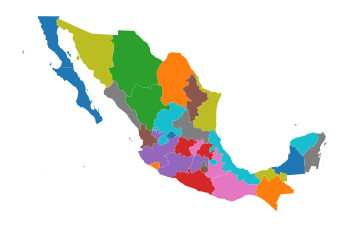

In [13]:
ax = gdf_ent.plot(column="CVE_ENT")
ax.set_axis_off()

##### Municipalities

In [14]:
mun_file = geometries_dir.joinpath("00mun.shp")
gdf_mun = gpd.read_file(filename=mun_file)
gdf_mun.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01001,01,001,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774..."
1,01002,01,002,Asientos,"POLYGON ((2494680.261 1141224.505, 2494749.948..."
2,01003,01,003,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902..."
3,01004,01,004,Cosío,"POLYGON ((2470517.824 1155028.588, 2470552.248..."
4,01005,01,005,Jesús María,"POLYGON ((2465526.729 1114740.466, 2465752.546..."


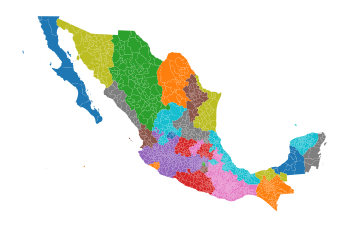

In [15]:
ax = gdf_mun.plot(column="CVE_ENT")
ax.set_axis_off()

#### Size of population information

In [16]:
population_file = geospatial_dir.joinpath("AGEEML_20208112019805.csv")
population_file.exists()

True

In [17]:
population_df = pd.read_csv(population_file, usecols = ["Cve_Ent", "Cve_Mun", "Pob_Total", "Total De Viviendas Habitadas"], na_values="-")
print(population_df.shape)
population_df.head()

(300679, 4)


,Cve_Ent,Cve_Mun,Pob_Total,Total De Viviendas Habitadas
0,1,1,722250.0,185120.0
1,1,1,14.0,2.0
2,1,1,37.0,11.0
3,1,1,10.0,1.0
4,1,1,7.0,1.0


## Preprocessing

### Mexican government

#### Fix column names

In [18]:
cases_df.columns = (
    cases_df.columns.
    str.strip().
    str.lower().
    to_series().
    replace(to_replace={
        ' ': '_',
        '/': '_',
        '(': '',
        ')': ''
        }   
    )
)
cases_df.columns

Index(['fecha_actualizacion', 'id_registro', 'origen', 'sector', 'entidad_um',
       'sexo', 'entidad_nac', 'entidad_res', 'municipio_res', 'tipo_paciente',
       'fecha_ingreso', 'fecha_sintomas', 'fecha_def', 'intubado', 'neumonia',
       'edad', 'nacionalidad', 'embarazo', 'habla_lengua_indig', 'diabetes',
       'epoc', 'asma', 'inmusupr', 'hipertension', 'otra_com',
       'cardiovascular', 'obesidad', 'renal_cronica', 'tabaquismo',
       'otro_caso', 'resultado', 'migrante', 'pais_nacionalidad',
       'pais_origen', 'uci'],
      dtype='object')

In [19]:
catalogs_dicts = {key.replace("Catálogo ", "").replace("de ", "").lower(): df.set_index(df.columns[0]).to_dict() for key, df in catalogs_dfs.items()}
catalogs_dicts.keys()

dict_keys(['origen', 'sector', 'sexo', 'tipo_paciente', 'si_no', 'nacionalidad', 'resultado', 'entidades', 'municipios'])

In [20]:
print(catalogs_dicts["resultado"])
del catalogs_dicts["resultado"]["Unnamed: 1"]["CLAVE"]

{'Unnamed: 1': {'CLAVE': 'DESCRIPCIÓN', 1: 'Positivo SARS-CoV-2', 2: 'No positivo SARS-CoV-2', 3: 'Resultado pendiente'}}


#### Replace original data with more human-readable descriptions

In [21]:
si_no_labels = (
    'intubado', 'neumonia', 'embarazo',
    'habla_lengua_indig','diabetes', 'epoc',
    'asma', 'inmusupr', 'hipertension',
    'otra_com', 'cardiovascular', 'obesidad',
    'renal_cronica', 'tabaquismo', 'otro_caso',
    'migrante', 'uci'
)

In [22]:
# (cases_df_keys): catalogs_dicts{item} to replace.
replacement_keys = {
    ('origen',): catalogs_dicts["origen"].get("DESCRIPCIÓN"),
    ('sector',): catalogs_dicts["sector"].get("DESCRIPCIÓN"),
    ('sexo',): catalogs_dicts["sexo"].get("DESCRIPCIÓN"),
    ('tipo_paciente',): catalogs_dicts["tipo_paciente"].get("DESCRIPCIÓN"),
    ("nacionalidad", ): catalogs_dicts["nacionalidad"].get("DESCRIPCIÓN"),
    ("pais_nacionalidad", "pais_origen"): {"99": "SE IGNORA", "97": "NO APLICA"},
    ("resultado",): catalogs_dicts["resultado"].get("Unnamed: 1"),
    si_no_labels: catalogs_dicts["si_no"].get("DESCRIPCIÓN")
}

In [23]:
for cases_columns, replacement in replacement_keys.items():
    
    for case_column in cases_columns:
        cases_df[case_column].replace(to_replace=replacement, inplace=True)
        
cases_df.head()

,fecha_actualizacion,id_registro,origen,sector,entidad_um,sexo,entidad_nac,entidad_res,municipio_res,tipo_paciente,...,cardiovascular,obesidad,renal_cronica,tabaquismo,otro_caso,resultado,migrante,pais_nacionalidad,pais_origen,uci
0,2020-08-11,1a62a3,FUERA DE USMER,ESTATAL,15,MUJER,15,15,2,AMBULATORIO,...,NO,NO,NO,NO,SI,Positivo SARS-CoV-2,NO ESPECIFICADO,México,SE IGNORA,NO APLICA
1,2020-08-11,1491cc,FUERA DE USMER,ESTATAL,27,MUJER,27,27,4,AMBULATORIO,...,NO,NO,NO,NO,SI,Positivo SARS-CoV-2,NO ESPECIFICADO,México,SE IGNORA,NO APLICA
2,2020-08-11,12bed1,FUERA DE USMER,ESTATAL,15,MUJER,15,15,106,AMBULATORIO,...,NO,NO,NO,NO,NO ESPECIFICADO,Positivo SARS-CoV-2,NO ESPECIFICADO,México,SE IGNORA,NO APLICA
3,2020-08-11,117245,FUERA DE USMER,ESTATAL,25,HOMBRE,26,25,6,AMBULATORIO,...,NO,NO,NO,NO,NO ESPECIFICADO,Positivo SARS-CoV-2,NO ESPECIFICADO,México,SE IGNORA,NO APLICA
4,2020-08-11,117cf6,FUERA DE USMER,ESTATAL,27,MUJER,27,27,13,HOSPITALIZADO,...,NO,NO,NO,NO,NO,Positivo SARS-CoV-2,NO ESPECIFICADO,México,SE IGNORA,NO


In [24]:
type_mask = cases_df.columns[cases_df.dtypes == object].drop(labels="sector")
type_mask

Index(['id_registro', 'origen', 'sexo', 'tipo_paciente', 'intubado',
       'neumonia', 'nacionalidad', 'embarazo', 'habla_lengua_indig',
       'diabetes', 'epoc', 'asma', 'inmusupr', 'hipertension', 'otra_com',
       'cardiovascular', 'obesidad', 'renal_cronica', 'tabaquismo',
       'otro_caso', 'resultado', 'migrante', 'pais_nacionalidad',
       'pais_origen', 'uci'],
      dtype='object')

In [25]:
cases_df[type_mask] = (
    cases_df[type_mask].
    apply(lambda x: x.str.capitalize())
)

In [26]:
cases_df.replace(
    to_replace={
        "sector": {
            "CRUZ ROJA": "Cruz roja",
            "ESTATAL": "Estatal",
            "MUNICIPAL": "Municipal",
            "PRIVADA": "Privada",
            "UNIVERSITARIO": "Universitario",
            "NO ESPECIFICADO": "No especificado"
        },
        "resultado": {
            "Positivo sars-cov-2": "Positivo",
            "No positivo sars-cov-2": "Negativo",
            "Resultado pendiente": "Pendiente"
        }
    },
    inplace=True
)
cases_df.head()

,fecha_actualizacion,id_registro,origen,sector,entidad_um,sexo,entidad_nac,entidad_res,municipio_res,tipo_paciente,...,cardiovascular,obesidad,renal_cronica,tabaquismo,otro_caso,resultado,migrante,pais_nacionalidad,pais_origen,uci
0,2020-08-11,1a62a3,Fuera de usmer,Estatal,15,Mujer,15,15,2,Ambulatorio,...,No,No,No,No,Si,Positivo,No especificado,México,Se ignora,No aplica
1,2020-08-11,1491cc,Fuera de usmer,Estatal,27,Mujer,27,27,4,Ambulatorio,...,No,No,No,No,Si,Positivo,No especificado,México,Se ignora,No aplica
2,2020-08-11,12bed1,Fuera de usmer,Estatal,15,Mujer,15,15,106,Ambulatorio,...,No,No,No,No,No especificado,Positivo,No especificado,México,Se ignora,No aplica
3,2020-08-11,117245,Fuera de usmer,Estatal,25,Hombre,26,25,6,Ambulatorio,...,No,No,No,No,No especificado,Positivo,No especificado,México,Se ignora,No aplica
4,2020-08-11,117cf6,Fuera de usmer,Estatal,27,Mujer,27,27,13,Hospitalizado,...,No,No,No,No,No,Positivo,No especificado,México,Se ignora,No


### Geospatial

#### Geometries

In [27]:
geometries_joined = (
    gdf_mun.merge(gdf_ent, on="CVE_ENT", suffixes=("_mun", "_ent")).
    pipe(lambda x: x.rename(columns=dict(zip(x.columns, x.columns.str.lower())))).
    rename(columns={"geometry_mun": "geometry"}).
    drop(columns=["cvegeo_ent"]).
    pipe(lambda x: x.apply(pd.to_numeric, errors="ignore")).
    pipe(lambda x: gpd.GeoDataFrame(x[sorted(x.columns)], geometry="geometry", crs=gdf_mun.crs))
)
print(geometries_joined.shape)
geometries_joined.head()

(2465, 7)


,cve_ent,cve_mun,cvegeo_mun,geometry,geometry_ent,nomgeo_ent,nomgeo_mun
0,1,1,1001,"POLYGON ((2489072.503 1115771.584, 2489352.774...","POLYGON ((2470517.824299999 1155028.588300001,...",Aguascalientes,Aguascalientes
1,1,2,1002,"POLYGON ((2494680.261 1141224.505, 2494749.948...","POLYGON ((2470517.824299999 1155028.588300001,...",Aguascalientes,Asientos
2,1,3,1003,"POLYGON ((2429607.454 1120262.254, 2429071.902...","POLYGON ((2470517.824299999 1155028.588300001,...",Aguascalientes,Calvillo
3,1,4,1004,"POLYGON ((2470517.824 1155028.588, 2470552.248...","POLYGON ((2470517.824299999 1155028.588300001,...",Aguascalientes,Cosío
4,1,5,1005,"POLYGON ((2465526.729 1114740.466, 2465752.546...","POLYGON ((2470517.824299999 1155028.588300001,...",Aguascalientes,Jesús María


#### Population size

In [28]:
mun_population = (
    population_df.
    pipe(lambda x: x.rename(columns=dict(zip(x.columns, x.columns.str.replace(" ", "_").str.lower())))).
    groupby(["cve_ent", "cve_mun"]).
    aggregate(sum).
    reset_index()
)
print(mun_population.shape)
mun_population.head()

(2466, 4)


,cve_ent,cve_mun,pob_total,total_de_viviendas_habitadas
0,1,1,789618.0,199881.0
1,1,2,45407.0,9996.0
2,1,3,54136.0,12847.0
3,1,4,15042.0,3467.0
4,1,5,97498.0,22309.0


#### Join all geospatial data

In [29]:
geometries_joined_full = (
    geometries_joined.
    merge(mun_population, on=["cve_ent","cve_mun"]).
    pipe(lambda df: gpd.GeoDataFrame(df, geometry="geometry", crs=gdf_mun.crs)).
    assign(area_km = lambda x: x.area / 1000).
    assign(
        densidad = lambda x: x.pob_total / x.area_km
    )
    
)
print(geometries_joined_full.shape)
geometries_joined_full.head()

(2465, 11)


,cve_ent,cve_mun,cvegeo_mun,geometry,geometry_ent,nomgeo_ent,nomgeo_mun,pob_total,total_de_viviendas_habitadas,area_km,densidad
0,1,1,1001,"POLYGON ((2489072.503 1115771.584, 2489352.774...","POLYGON ((2470517.824299999 1155028.588300001,...",Aguascalientes,Aguascalientes,789618.0,199881.0,1.166359e+06,0.676994
1,1,2,1002,"POLYGON ((2494680.261 1141224.505, 2494749.948...","POLYGON ((2470517.824299999 1155028.588300001,...",Aguascalientes,Asientos,45407.0,9996.0,5.433743e+05,0.083565
2,1,3,1003,"POLYGON ((2429607.454 1120262.254, 2429071.902...","POLYGON ((2470517.824299999 1155028.588300001,...",Aguascalientes,Calvillo,54136.0,12847.0,9.233578e+05,0.058629
3,1,4,1004,"POLYGON ((2470517.824 1155028.588, 2470552.248...","POLYGON ((2470517.824299999 1155028.588300001,...",Aguascalientes,Cosío,15042.0,3467.0,1.283835e+05,0.117165
4,1,5,1005,"POLYGON ((2465526.729 1114740.466, 2465752.546...","POLYGON ((2470517.824299999 1155028.588300001,...",Aguascalientes,Jesús María,97498.0,22309.0,4.998951e+05,0.195037


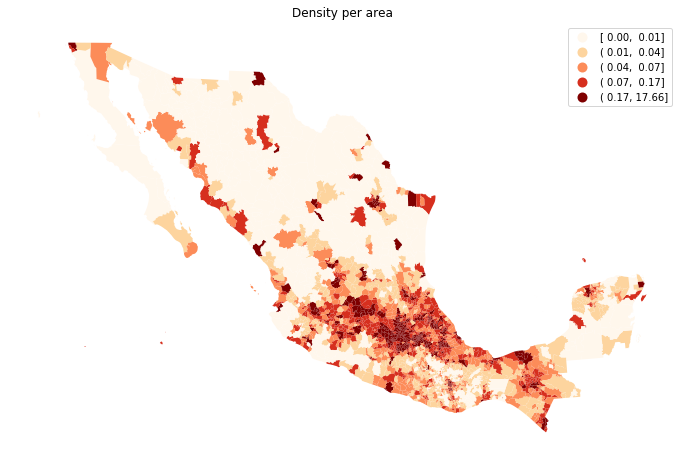

In [30]:
ax = geometries_joined_full.plot(column="densidad",
                            legend=True,
                            figsize=(12,12),
                            cmap="OrRd",
                            scheme="quantiles"
                           )
ax.set_axis_off()
plt.title("Density per area");

### Join data sources

#### Look for incosistencies

##### States

In [31]:
cases_states_codes = catalogs_dicts["entidades"].get("ENTIDAD_FEDERATIVA")
geospatial_states_codes = dict(zip(gdf_ent.CVE_ENT.apply(int), gdf_ent.NOMGEO))

In [32]:
x = {key: value.lower() for key, value in cases_states_codes.items()}
y = {key: value.lower() for key, value in geospatial_states_codes.items()}
unshared_keys = {key: x[key] for key in set(x.keys()).difference(y.keys())}
unshared_keys

{97: 'no aplica',
 98: 'se ignora',
 99: 'no especificado',
 36: 'estados unidos mexicanos'}

In [33]:
unshared_shared_values = {k: (x[k], y[k]) for k in x if k in y and x[k] != y[k]}
unshared_shared_values

{}

In [34]:
geospatial_states_codes.update({key: value.capitalize() for key, value in cases_states_codes.items() if key in unshared_keys})

##### Municipalities

In [35]:
cases_municipalities_codes = catalogs_dfs["Catálogo MUNICIPIOS"].set_index(["CLAVE_ENTIDAD", "CLAVE_MUNICIPIO"])["MUNICIPIO"].to_dict()
geospatial_municipalities_codes = geometries_joined_full.set_index(["cve_ent", "cve_mun"])["nomgeo_mun"].to_dict()

In [36]:
x = {key: value.lower() for key, value in cases_municipalities_codes.items()}
y = {key: value.lower() for key, value in geospatial_municipalities_codes.items()}

In [37]:
unshared_keys = {key: x[key] for key in set(x.keys()).difference(y.keys())}
unshared_keys

{(36, 999): 'no especificado',
 (31, 999): 'no especificado',
 (24, 999): 'no especificado',
 (10, 999): 'no especificado',
 (19, 999): 'no especificado',
 (5, 999): 'no especificado',
 (14, 999): 'no especificado',
 (30, 999): 'no especificado',
 (9, 999): 'no especificado',
 (4, 999): 'no especificado',
 (8, 999): 'no especificado',
 (3, 999): 'no especificado',
 (29, 999): 'no especificado',
 (97, 997): 'no aplica',
 (28, 999): 'no especificado',
 (23, 999): 'no especificado',
 (2, 999): 'no especificado',
 (98, 998): 'se ignora',
 (32, 999): 'no especificado',
 (18, 999): 'no especificado',
 (27, 999): 'no especificado',
 (13, 999): 'no especificado',
 (22, 999): 'no especificado',
 (1, 999): 'no especificado',
 (17, 999): 'no especificado',
 (12, 999): 'no especificado',
 (7, 999): 'no especificado',
 (16, 999): 'no especificado',
 (11, 999): 'no especificado',
 (6, 999): 'no especificado',
 (26, 999): 'no especificado',
 (99, 999): 'no especificado',
 (21, 999): 'no especificado'

In [38]:
unshared_shared_values = {k: (x[k], y[k]) for k in x if k in y and x[k] != y[k]}
unshared_shared_values

{(20, 43): ('juchitán de zaragoza', 'heroica ciudad de juchitán de zaragoza'),
 (20, 459): ('villa de santiago chazumba', 'santiago chazumba')}

In [39]:
municipality_keys = ['cve_ent', 'cve_mun', 'nomgeo_mun', "cvegeo_mun"]

In [40]:
to_add_df = pd.DataFrame([[*keys, value.capitalize(), None] for keys, value in unshared_keys.items()], columns=municipality_keys)
municipalities_replacement_df = (
    geometries_joined_full[municipality_keys].
    append(to_add_df).
    rename(columns={"cve_ent": "entidad_res", "cve_mun": "municipio_res", "nomgeo_mun": "municipio_res_name"})
)
municipalities_replacement_df.head()

,entidad_res,municipio_res,municipio_res_name,cvegeo_mun
0,1,1,Aguascalientes,1001
1,1,2,Asientos,1002
2,1,3,Calvillo,1003
3,1,4,Cosío,1004
4,1,5,Jesús María,1005


#### Perform replacement and add some useful columns

In [41]:
bins = [x*4 for x in range(0,32)]
labels = ["{}-{}".format(start, end) for start, end in zip(bins[:-1], bins[1:])]
cases_df["rango_edad"] = pd.cut(cases_df.edad, bins=bins, include_lowest=True, labels=labels)

In [42]:
cases_df_verbose = (
    cases_df.assign(
        entidad_um_name= lambda x: x.entidad_um.replace(geospatial_states_codes),
        entidad_nac_name= lambda x: x.entidad_um.replace(geospatial_states_codes),
        entidad_res_name= lambda x: x.entidad_um.replace(geospatial_states_codes),
    ).
    pipe(lambda x: pd.merge(x, municipalities_replacement_df, on=["entidad_res", "municipio_res"])).
    drop(columns=["entidad_nac", "entidad_res", "municipio_res", "entidad_um"]).
    assign(estado=lambda x: x.fecha_def.isnull()).
    replace(to_replace=dict(estado={True: "Vivo", False: "Fallecido"}))
)
cases_df_verbose.head()

,fecha_actualizacion,id_registro,origen,sector,sexo,tipo_paciente,fecha_ingreso,fecha_sintomas,fecha_def,intubado,...,pais_nacionalidad,pais_origen,uci,rango_edad,entidad_um_name,entidad_nac_name,entidad_res_name,municipio_res_name,cvegeo_mun,estado
0,2020-08-11,1a62a3,Fuera de usmer,Estatal,Mujer,Ambulatorio,2020-06-11,2020-06-08,NaT,No aplica,...,México,Se ignora,No aplica,20-24,México,México,México,Acolman,15002,Vivo
1,2020-08-11,17ecaf,Fuera de usmer,Estatal,Hombre,Ambulatorio,2020-05-27,2020-05-26,NaT,No aplica,...,México,Se ignora,No aplica,52-56,México,México,México,Acolman,15002,Vivo
2,2020-08-11,1be334,Fuera de usmer,Estatal,Hombre,Ambulatorio,2020-05-16,2020-05-15,NaT,No aplica,...,México,Se ignora,No aplica,12-16,México,México,México,Acolman,15002,Vivo
3,2020-08-11,1b2937,Fuera de usmer,IMSS,Mujer,Ambulatorio,2020-04-23,2020-04-23,NaT,No aplica,...,México,Se ignora,No aplica,24-28,México,México,México,Acolman,15002,Vivo
4,2020-08-11,15079d,Fuera de usmer,SSA,Hombre,Ambulatorio,2020-05-14,2020-05-12,NaT,No aplica,...,México,Se ignora,No aplica,48-52,México,México,México,Acolman,15002,Vivo


In [43]:
mask = cases_df_verbose.dtypes == object
cases_df_verbose.loc[:, mask] = cases_df_verbose.loc[:, mask].apply(lambda x: x.astype(str).str.strip())

### Save preprocessing data

In [44]:
interim_dir = datadir("interim")
interim_dir.mkdir(exist_ok=True)

#### Cases

In [45]:
out_cases_dir = interim_dir.joinpath("mexican_government"); out_cases_dir.mkdir(exist_ok=True)
out_cases_file = out_cases_dir.joinpath("{}{}".format(cases_file.stem, cases_file.suffix))

In [46]:
cases_df_verbose.to_csv(out_cases_file, index=False)

#### Geospatial

In [47]:
out_geospatial_dir = interim_dir.joinpath("geospatial"); out_geospatial_dir.mkdir(exist_ok=True)
out_geospatial_file = out_geospatial_dir.joinpath("00munent.shp")

In [48]:
geometries_joined_full.drop(columns="geometry_ent").to_file(out_geospatial_file)

## Convert to english data set (manually :c) 

### Cases

#### Column names

In [49]:
en_columns = dict(
    fecha_actualizacion="date_update",
    id_registro="registration_id",
    origen="origin",
    sector="sector",
    sexo="sex",
    tipo_paciente="patient_type",
    fecha_ingreso="date_admission",
    fecha_sintomas="date_symptoms",
    fecha_def="date_death",
    habla_lengua_indig="speaks_lang_indig",
    diabetes="diabetes",
    embarazo="pregnancy",
    intubado="intubated",
    epoc="epoc",
    asma="asthma",
    inmusupr="immunosuppressed",
    hipertension="hypertension",
    otra_com="other_comorbidity",
    cardiovascular="cardiovascular",
    obesidad="obesity",
    renal_cronica="chronic_kidney",
    tabaquismo="smoking",
    neumonia="pneumonia",
    otro_caso="other_case",
    resultado="result",
    migrante="migrant",
    nacionalidad="nacionality",
    pais_nacionalidad="country_nacionality",
    pais_origen="country_origin",
    uci="icu",
    edad="age",
    rango_edad="age_range",
    entidad_um_name="state_um_name",
    entidad_nac_name="sate_nac_name",
    entidad_res_name="state_res_name",
    municipio_res_name="mun_res_name",
    cvegeo_mun="mun_cvegeo",
    estado="status" 
)
set(cases_df_verbose.columns.to_list()).difference(set(en_columns))

set()

#### Values

In [50]:
unique_values = []
for column in cases_df_verbose.select_dtypes(include=object).columns:
    if column == "id_registro" or column=="cvegeo_mun":
        pass
    elif "name" not in column and "pais" not in column:
        unique_values.extend(cases_df_verbose[column].unique().tolist())
unique_values = set(unique_values)
unique_values

{'Ambulatorio',
 'Cruz roja',
 'DIF',
 'Estatal',
 'Extranjera',
 'Fallecido',
 'Fuera de usmer',
 'Hombre',
 'Hospitalizado',
 'IMSS',
 'IMSS-BIENESTAR',
 'ISSSTE',
 'Mexicana',
 'Mujer',
 'Municipal',
 'Negativo',
 'No',
 'No aplica',
 'No especificado',
 'PEMEX',
 'Pendiente',
 'Positivo',
 'Privada',
 'SEDENA',
 'SEMAR',
 'SSA',
 'Se ignora',
 'Si',
 'Universitario',
 'Usmer',
 'Vivo'}

In [51]:
en_replacement_values = {
    'Ambulatorio': "Ambulatory",
     'Cruz roja': "Mexican Red Cross",
     'DIF': "DIF",
     'Estatal': "State",
     'Extranjera': "Foreigner",
     'Fallecido': "Decease",
     'Fuera de usmer': "Out of USMER",
     'Hombre': "Man",
     'Hospitalizado': "Hospitalized",
     'IMSS': "IMSS",
     'IMSS-BIENESTAR': "IMSS-BIENESTAR",
     'ISSSTE': "ISSSTE",
     'Mexicana': "Mexican",
     'Mujer': "Woman",
     'Municipal': "Municipal",
     'Negativo': "Negative",
     'No': "No",
     'No aplica': "Does not apply",
     'No especificado': "Not specified",
     'PEMEX': "PEMEX",
     'Pendiente': "Pending",
     'Positivo': "Positive",
     'Privada': "Private",
     'SEDENA': "SEDENA",
     'SEMAR': "SEMAR",
     'SSA': "SSA",
     'Se ignora': "It is ignored",
     'Si': "Yes",
     'Universitario': "Academic",
     'Usmer': "USMER",
     'Vivo': "Alive"
}

In [52]:
cases_df_verbose_en = (
    cases_df_verbose.
    rename(columns=en_columns).
    replace(to_replace=en_replacement_values)
)
cases_df_verbose_en.head()

,date_update,registration_id,origin,sector,sex,patient_type,date_admission,date_symptoms,date_death,intubated,...,country_nacionality,country_origin,icu,age_range,state_um_name,sate_nac_name,state_res_name,mun_res_name,mun_cvegeo,status
0,2020-08-11,1a62a3,Out of USMER,State,Woman,Ambulatory,2020-06-11,2020-06-08,NaT,Does not apply,...,México,It is ignored,Does not apply,20-24,México,México,México,Acolman,15002,Alive
1,2020-08-11,17ecaf,Out of USMER,State,Man,Ambulatory,2020-05-27,2020-05-26,NaT,Does not apply,...,México,It is ignored,Does not apply,52-56,México,México,México,Acolman,15002,Alive
2,2020-08-11,1be334,Out of USMER,State,Man,Ambulatory,2020-05-16,2020-05-15,NaT,Does not apply,...,México,It is ignored,Does not apply,12-16,México,México,México,Acolman,15002,Alive
3,2020-08-11,1b2937,Out of USMER,IMSS,Woman,Ambulatory,2020-04-23,2020-04-23,NaT,Does not apply,...,México,It is ignored,Does not apply,24-28,México,México,México,Acolman,15002,Alive
4,2020-08-11,15079d,Out of USMER,SSA,Man,Ambulatory,2020-05-14,2020-05-12,NaT,Does not apply,...,México,It is ignored,Does not apply,48-52,México,México,México,Acolman,15002,Alive


In [53]:
out_en_cases_file = out_cases_dir.joinpath("{}_en{}".format(cases_file.stem, cases_file.suffix))

In [54]:
cases_df_verbose_en.to_csv(out_en_cases_file, index=False)